In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np

In [ ]:
!unzip  /content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/s200r-EWCFreeze-v2.5.zip

In [ ]:
path = '/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTStrict_2tasks.4/hwu64_bert_adapter_ewc_freeze_random'
# path = 's200r-EWCFreeze-v2.5/bert_dis_bert_adapter_ewc_freeze_random'

In [ ]:
pathb = '/content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/hwuRBS-AdapterSEQ-copy/hwu64_bert_adapter_seq_random'

### Best F1 Analysis

In [ ]:
from collections import Counter
# EWC/CTR/SEQ: check best f1 location
best_f1_location_check = []
overfit_task = []
kt_task = []
for seed_idx in [101,2650,0]:
    for rand_idx in range(7):
        list_of_lists = []
        with open(path+str(rand_idx)+'_seed'+str(seed_idx)+'_f1.txt', 'r') as f:
            for line in f:
                inner_list = [float(elt.strip()) for elt in line.split('\t')]
                list_of_lists.append(inner_list)
        f1_matrix = np.array(list_of_lists)
        assert f1_matrix.shape == (6,6)
        temp_best = []
        for i in range(5): # Exclude the last task
            location = np.argmax(f1_matrix[i:,i])
            best_f1_location_check.append(location==0)
            if location==0:
                overfit_task.append(i)
            if location!=0:
                kt_task.append(i)
print(np.mean(best_f1_location_check))
print('kt tasks:',Counter(kt_task))
print('overfit tasks:',Counter(overfit_task))

0.8761904761904762
kt tasks: Counter({3: 5, 2: 4, 0: 4})
overfit tasks: Counter({1: 21, 4: 21, 0: 17, 2: 17, 3: 16})


### Metrics

In [ ]:
overall_f1 = []
forgetting = []
best_f1 = []
worst_f1 = []
for seed_idx in [0]:
# for seed_idx in [0,101,2650]:
    # for rand_idx in range(7):
    # for rand_idx in [0,2,10,12,13,14,15]:
    for rand_idx in [0,3,6]:
    # for rand_idx in [0,10,13]:
    # for rand_idx in [0]:
        list_of_lists = []
        with open(path+str(rand_idx)+'_seed'+str(seed_idx)+'_f1.txt', 'r') as f:
            for line in f:
                inner_list = [float(elt.strip()) for elt in line.split('\t')]
                list_of_lists.append(inner_list)
        f1_matrix = np.array(list_of_lists)
        assert f1_matrix.shape == (6,6)
        print(f1_matrix)
        # if 'annomi' in path and 'rrr' in path and rand_idx==0:
            # print('modified for annomi')
            # overall_f1.append(np.mean(f1_matrix[3,:]))
            # temp_forgetting = []
            # for i in range(3):
            #     temp_forgetting.append(np.max(f1_matrix[i:-3,i])-f1_matrix[3,i])
            # forgetting.append(np.mean(temp_forgetting))
            # temp_best = []
            # for i in range(4):
            #     temp_best.append(np.max(f1_matrix[i:,i]))
            # best_f1.append(np.mean(temp_best))
            # temp_worst = []
            # for i in range(4):
            #     temp_worst.append(np.min(f1_matrix[i:-2,i]))
            # worst_f1.append(np.mean(temp_worst))
        # else:
        overall_f1.append(np.mean(f1_matrix[1,:2])) # overall_f1.append(np.mean(f1_matrix[5,:]))
        temp_forgetting = []
        for i in range(1): # for i in range(5):
            temp_forgetting.append(np.max(f1_matrix[i:-1,i])-f1_matrix[1,i]) # temp_forgetting.append(np.max(f1_matrix[i:-1,i])-f1_matrix[5,i])
        forgetting.append(np.mean(temp_forgetting))
        temp_best = []
        # for i in range(6):
        #     temp_best.append(np.max(f1_matrix[i:,i]))
        # best_f1.append(np.mean(temp_best))
        # temp_worst = []
        # for i in range(6):
        #     temp_worst.append(np.min(f1_matrix[i:,i]))
        # worst_f1.append(np.mean(temp_worst))
# assert len(overall_f1)==21
# assert len(forgetting)==21
# assert len(best_f1)==21
# assert len(worst_f1)==21
print(len(overall_f1))

[[0.9266 0.     0.     0.     0.     0.    ]
 [0.4662 0.9891 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]]
[[0.6941 0.     0.     0.     0.     0.    ]
 [0.1873 0.9813 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]]
[[0.6967 0.     0.     0.     0.     0.    ]
 [0.4284 0.7181 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]]
3


In [ ]:
overall_f1 = [val*100 for val in overall_f1]
print(np.mean(overall_f1), np.std(overall_f1))
print(np.mean(forgetting)*100)
# print(np.mean(best_f1)*100)
# print(np.mean(worst_f1)*100)

62.839999999999996 7.0325185152025504
41.18333333333333


In [ ]:
!unzip  /content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/s200r-EWCFreeze-v2.1.zip

In [ ]:
# path2 = '/content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/AnnoMIStr-TaskDrop/annomi_taskdrop_random'
path2 = 's200r-EWCFreeze-v2.1/bert_dis_bert_adapter_ewc_freeze_random'

In [ ]:
overall_f1_compare = []
forgetting_compare = []
best_f1_compare = []
worst_f1_compare = []
for seed_idx in [0]:
# for seed_idx in [101,2650,0]:
    # for rand_idx in range(7):
    # for rand_idx in [0,2,10,12,13,14,15]:
    for rand_idx in [0,3,6]:
        list_of_lists = []
        with open(path2+str(rand_idx)+'_seed'+str(seed_idx)+'_f1.txt', 'r') as f:
            for line in f:
                inner_list = [float(elt.strip()) for elt in line.split('\t')]
                list_of_lists.append(inner_list)
        f1_matrix = np.array(list_of_lists)
        assert f1_matrix.shape == (6,6)
        # print(f1_matrix)
        # if 'annomi' in path2 and 'replay' in path2 and rand_idx==0:
        #     print('modified for annomi')
        #     overall_f1_compare.append(np.mean(f1_matrix[3,:]))
        #     temp_forgetting = []
        #     for i in range(3):
        #         temp_forgetting.append(np.max(f1_matrix[i:-3,i])-f1_matrix[3,i])
        #     forgetting_compare.append(np.mean(temp_forgetting))
        #     temp_best = []
        #     for i in range(4):
        #         temp_best.append(np.max(f1_matrix[i:,i]))
        #     best_f1_compare.append(np.mean(temp_best))
        #     temp_worst = []
        #     for i in range(4):
        #         temp_worst.append(np.min(f1_matrix[i:-2,i]))
        #     worst_f1_compare.append(np.mean(temp_worst))
        # else:
        overall_f1_compare.append(np.mean(f1_matrix[5,:]))
        temp_forgetting = []
        for i in range(5):
            temp_forgetting.append(np.max(f1_matrix[i:-1,i])-f1_matrix[5,i])
        forgetting_compare.append(np.mean(temp_forgetting))
        temp_best = []
        for i in range(6):
            temp_best.append(np.max(f1_matrix[i:,i]))
        best_f1_compare.append(np.mean(temp_best))
        temp_worst = []
        for i in range(6):
            temp_worst.append(np.min(f1_matrix[i:,i]))
        worst_f1_compare.append(np.mean(temp_worst))
# assert len(overall_f1_compare)==21
# assert len(forgetting_compare)==21
# assert len(best_f1_compare)==21
# assert len(worst_f1_compare)==21
print(len(overall_f1_compare))

3


In [ ]:
overall_f1_compare = [val*100 for val in overall_f1_compare]
print(np.mean(overall_f1_compare), np.std(overall_f1_compare))
print(np.mean(forgetting_compare)*100)
print(np.mean(best_f1_compare)*100)
print(np.mean(worst_f1_compare)*100)

83.22333333333334 1.8766049920791208
1.328000000000001
84.71222222222222
69.97888888888889


### Diaz+Chaudhary Metrics

In [ ]:
mtl = [0.8558,0.8918,0.8365,0.9120,0.8918,0.8038,0.9120]

In [ ]:
overall_f1 = []
bwt1 = []
bwt2 = []
bwt3 = []
pbwt3 = []
p2bwt3 = []
fwt = []
# rem = []
# pbwt = []
# intra = []
for seed_idx in [0]:
# for seed_idx in [101,2650,0]:
    mtl_idx=0
    # for rand_idx in range(7):
    for rand_idx in [0,3,6]:
    # for rand_idx in [0,10,13]:
    # for rand_idx in [0,2,10,12,13,14,15]:
        list_of_lists = []
        with open(path+str(rand_idx)+'_seed'+str(seed_idx)+'_f1.txt', 'r') as f:
            for line in f:
                inner_list = [float(elt.strip()) for elt in line.split('\t')]
                list_of_lists.append(inner_list)
        f1_matrix = np.array(list_of_lists)
        assert f1_matrix.shape == (6,6)
        # print(f1_matrix)
        # temp_acc = []
        # for i in range(6):
        #     temp_acc.append(np.mean(f1_matrix[i,:i+1]))
        # overall_f1.append(np.mean(temp_acc))
        # temp_bwt1 = []
        # for i in [1,2,3,4,5]:
        #     for j in range(0,i):
        #         temp_bwt1.append(f1_matrix[i,j]-f1_matrix[j,j])
        # bwt1.append(np.mean(temp_bwt1))
        # temp_bwt2 = []
        # for i in [1,2,3,4,5]:
        #     for j in range(0,i):
        #         temp_bwt2.append(f1_matrix[i,j]-np.max([f1_matrix[k,j] for k in range(j,i)]))
        #         # print(i,j,[f1_matrix[k,j] for k in range(j,i)])
        # bwt2.append(np.mean(temp_bwt2))
        # temp_bwt3 = []
        # for i in [1,2,3,4,5]:
        #     for j in range(0,i):
        #         temp_bwt3.append(f1_matrix[i,j]-f1_matrix[i-1,j])
        # bwt3.append(np.mean(temp_bwt3))
        #################################################################
        # temp_pbwt3 = []
        # for i in [1,2,3,4,5]:
        #     for j in range(0,i):
        #         temp_pbwt3.append(np.maximum(f1_matrix[i,j]-f1_matrix[i-1,j],0))
        # pbwt3.append(np.mean(temp_pbwt3))
        temp_p2bwt3 = []
        for i in [1]: # for i in [1,2,3,4,5]:
            for j in range(0,i):
                temp_p2bwt3.append(np.maximum(f1_matrix[i,j]-f1_matrix[i-1,j],0))
        check = sum([True if val>0 else False for val in temp_p2bwt3])
        if check>0:
            p2bwt3.append(np.true_divide(sum(temp_p2bwt3),check))
        else:
            p2bwt3.append(0)
        # rem.append(1-
        #            np.absolute(
        #                np.minimum(np.mean(temp_bwt),0)
        #                )
        #            )
        # pbwt.append(np.maximum(np.mean(temp_bwt),0))
        # intra.append(mtl[mtl_idx]-f1_matrix[5,5])
        # mtl_idx+=1
        list_of_lists = []
        with open(pathb+str(rand_idx)+'_seed'+str(seed_idx)+'_f1.txt', 'r') as f:
            for line in f:
                inner_list = [float(elt.strip()) for elt in line.split('\t')]
                list_of_lists.append(inner_list)
        f1_matrix_seq = np.array(list_of_lists)
        temp_fwt = []
        for i in [1]: # for i in [1,2,3,4,5]:
            temp_fwt.append(f1_matrix[i,i]-f1_matrix_seq[i,i])
        fwt.append(np.mean(temp_fwt))
# assert len(overall_f1)==21
# assert len(bwt)==21
# assert len(rem)==21
# assert len(pbwt)==21
# assert len(intra)==21
print(len(overall_f1))

0


In [ ]:
# overall_f1 = [val*100 for val in overall_f1]
# print(np.mean(overall_f1), np.std(overall_f1))
# print(np.mean(bwt1)*100)
# print(np.mean(bwt2)*100)
# print(np.mean(bwt3)*100)
# print(np.mean(pbwt3)*100)
print(np.mean(p2bwt3)*100)
print(np.mean(fwt)*100)
# print(np.mean(rem)*100)
# print(np.mean(pbwt)*100)
# print(np.mean(intra)*100)

0.0
20.72666666666666


### Significance Test

In [ ]:
from scipy.stats import ttest_ind, ttest_rel

In [ ]:
res = ttest_rel(overall_f1,overall_f1_compare, alternative='greater')
t = res[0]
p = res[1]
alpha = 0.1
# test if A > B
if p < alpha and t > 0:
  # reject the null hypothesis (no effect) => A > B !!
  print('Yes!', p)
else:
  # accept the null hypothesis => no effect
  print('No!', p)

Yes! 0.03357277954113428


In [ ]:
res = ttest_ind(forgetting_compare,forgetting)
t = res[0]
p = res[1]
alpha = 0.1
# test if A > B
if p/2 < alpha and t>0:
  # reject the null hypothesis (no effect) => A > B !!
  print('Yes!')
else:
  # accept the null hypothesis => no effect
  print('No!', p/2)

Yes!


### Modified ParamCount - EWC Freeze

In [ ]:
import pickle
import torch

In [ ]:
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

In [ ]:
path3 = 's200r-EWCFreeze-v2.4/modified_paramcount_random'

In [ ]:
check_counts = {}
for seed in [0,101,2650]:
    for rand_idx in [0,3,6]:
        for m in [1,2,3,4,5]:
            with open(path3+str(rand_idx)+'_seed'+str(seed)+'model_'+str(m)+'.pkl', 'rb') as handle:
                # temp = torch.load(handle, map_location=torch.device('cpu'))
                temp = CPU_Unpickler(handle).load()
                check_counts['random'+str(rand_idx)+'seed'+str(seed)+'model'+str(m)] = temp


In [ ]:
for k,v in check_counts['random6seed2650model5'].items():
  print(k,v)

bert.encoder.layer.0.attention.output.LayerNorm.weight tensor(767)
bert.encoder.layer.0.attention.output.LayerNorm.bias tensor(763)
bert.encoder.layer.0.attention.output.adapter.fc1.weight tensor(1526263)
bert.encoder.layer.0.attention.output.adapter.fc1.bias tensor(1993)
bert.encoder.layer.0.attention.output.adapter.fc2.weight tensor(1514594)
bert.encoder.layer.0.attention.output.adapter.fc2.bias tensor(760)
bert.encoder.layer.0.output.LayerNorm.weight tensor(767)
bert.encoder.layer.0.output.LayerNorm.bias tensor(760)
bert.encoder.layer.0.output.adapter.fc1.weight tensor(1529991)
bert.encoder.layer.0.output.adapter.fc1.bias tensor(1993)
bert.encoder.layer.0.output.adapter.fc2.weight tensor(1525499)
bert.encoder.layer.0.output.adapter.fc2.bias tensor(761)
bert.encoder.layer.1.attention.output.LayerNorm.weight tensor(767)
bert.encoder.layer.1.attention.output.LayerNorm.bias tensor(763)
bert.encoder.layer.1.attention.output.adapter.fc1.weight tensor(1528659)
bert.encoder.layer.1.attentio

### Unstable ParamCount

In [ ]:
import pickle
import torch
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

In [ ]:
path3 = '/content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/s200rME3-EWCFreeze-v2.1-IC/random'

In [ ]:
check_counts = {}
# for seed in [0,101,2650]:
for seed in [0]:
    # for rand_idx in [0,3,6]:
    for rand_idx in [0]:
        for m in [1,2,3,4,5]:
            with open(path3+str(rand_idx)+'_seed'+str(seed)+'model_'+str(m)+'_instability_paramcount.pkl', 'rb') as handle:
                # temp = torch.load(handle, map_location=torch.device('cpu'))
                temp = CPU_Unpickler(handle).load()
                check_counts['random'+str(rand_idx)+'seed'+str(seed)+'model'+str(m)] = temp

In [ ]:
for k,v in check_counts['random0seed0model3'].items():
  print(k,v)
  break

bert.encoder.layer.0.attention.output.LayerNorm.weight tensor(740)


### Sensitivity Graph

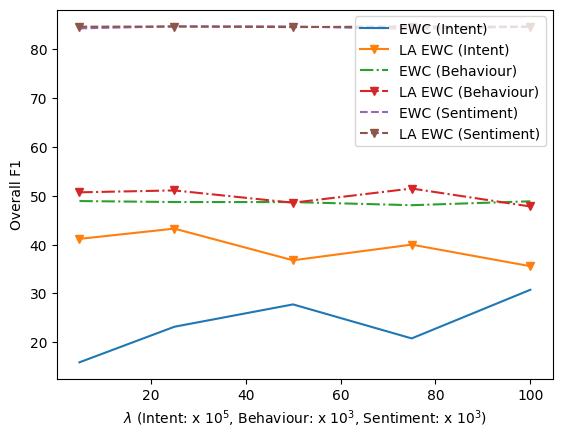

In [ ]:
import matplotlib.pyplot as plt

x_i = [5, 25, 50, 75, 100]
y1 = [15.88, 23.17, 27.75, 20.78, 30.75]
y2 = [41.18, 43.28, 36.79, 40.00, 35.58]
x_b = [5,25,50,75,100]
y3 = [48.93,48.73,48.72,48.08,48.88]
y4 = [50.72,51.11,48.59,51.50,47.82]
x_s = [5,25,50,75,100]
y5 = [84.32,84.74,84.72,84.19,84.68]
y6 = [84.67,84.69,84.58,84.70,84.66]

plt.plot(x_i, y1, label ='EWC (Intent)',)
plt.plot(x_i, y2, '-v', label ='LA EWC (Intent)')
plt.plot(x_b, y3, '-.', label ='EWC (Behaviour)')
plt.plot(x_b, y4, '-.v', label ='LA EWC (Behaviour)')
plt.plot(x_s, y5, '--', label ='EWC (Sentiment)')
plt.plot(x_s, y6, '--v', label ='LA EWC (Sentiment)')

plt.xlabel("$\lambda$ (Intent: x $10^5$, Behaviour: x $10^3$, Sentiment: x $10^3$)")
plt.ylabel("Overall F1")
plt.legend(loc='upper right')
# plt.title('Sensitivity analysis')
plt.show()

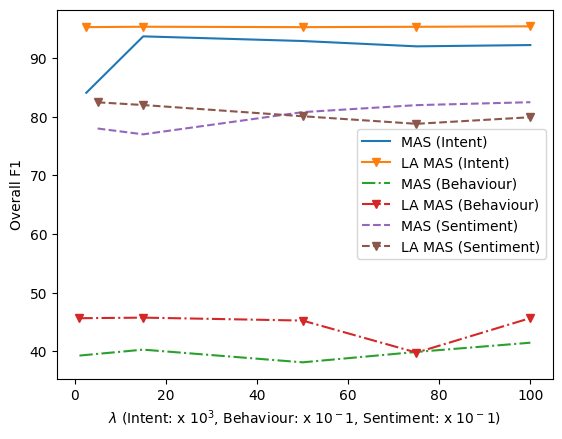

In [ ]:
import matplotlib.pyplot as plt

x_i = [2.5,15,50,75,100]
y1 = [84.04,93.65,92.86,91.95,92.17]
y2 = [95.22,95.29,95.22,95.28,95.36]
x_b = [1,15,50,75,100]
y3 = [39.30,40.31,38.15,39.92,41.49]
y4 = [45.66,45.76,45.26,39.81,45.68]
x_s = [5,15,50,75,100]
y5 = [77.96,76.97,80.75,81.94,82.44]
y6 = [82.42,81.96,80.05,78.76,79.88]

plt.plot(x_i, y1, label ='MAS (Intent)')
plt.plot(x_i, y2, '-v', label ='LA MAS (Intent)')
plt.plot(x_b, y3, '-.', label ='MAS (Behaviour)')
plt.plot(x_b, y4, '-.v', label ='LA MAS (Behaviour)')
plt.plot(x_s, y5, '--', label ='MAS (Sentiment)')
plt.plot(x_s, y6, '--v', label ='LA MAS (Sentiment)')

plt.xlabel("$\lambda$ (Intent: x $10^3$, Behaviour: x $10^-1$, Sentiment: x $10^-1$)")
plt.ylabel("Overall F1")
plt.legend()
# plt.title('Sensitivity analysis')
plt.show()

### Look-Ahead

Text(0, 0.5, 'Overall F1')

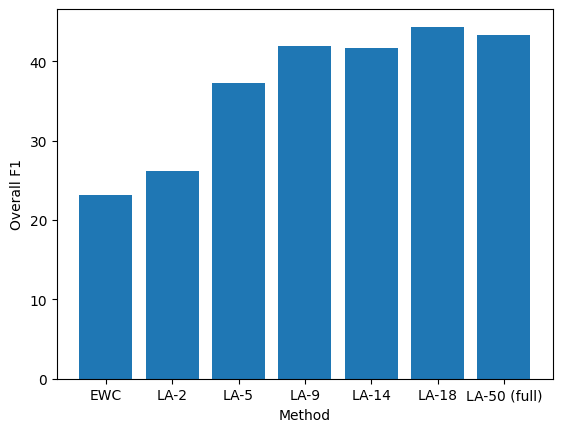

In [ ]:
import matplotlib.pyplot as plt

x = ['EWC','LA-2','LA-5','LA-9','LA-14','LA-18','LA-50 (full)']
y = [23.17,26.14,37.29,41.90,41.64,44.36,43.28]

plt.bar(x,y)
plt.xlabel("Method")
plt.ylabel("Overall F1")

### Loss Curve

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
paths = ['/content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/IntentSH_NoL1NoRegLAEWC_wlast_AdaptKTEasy_2tasks.3/hwu64_bert_adapter_ewc_freeze_fo_valid_acc_1_random0_seed0.txt'
        ,'/content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/IntentSH_NoL1LAEWC_wlast_AdaptKTEasy_2tasks.3/hwu64_bert_adapter_ewc_freeze_fo_valid_acc_1_random0_seed0.txt'
        ]
labels = ['without regularisation'
          ,'with regularisation'
          ]

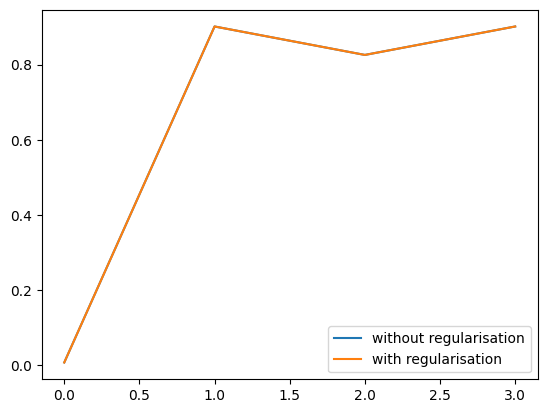

In [ ]:
for label,path in zip(labels,paths):
    y = np.loadtxt(path, dtype=float)
    if len(y)<=50:
        y = y[:-5]
        # y = y
    plt.plot(y, label=label)
plt.legend()
plt.show()

### Alpha_Rel + Alpha_Old

In [ ]:
import pickle
import torch
import io
from matplotlib import pyplot as plt

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

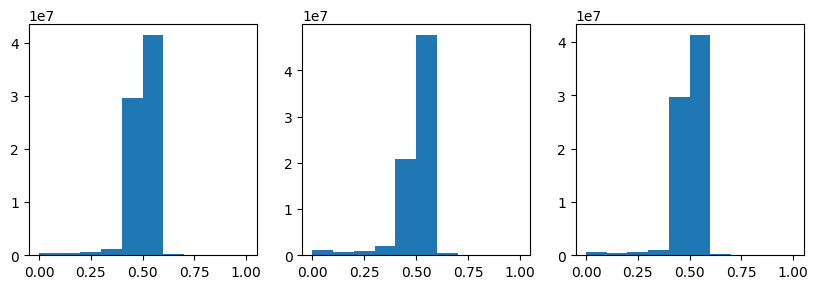

In [ ]:
path_alpharel = '/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptZero_2tasks.4/'

fig, axes = plt.subplots(nrows=1, ncols=3, sharey='row', figsize=(10, 3))
for seed in [0]:
    for ax_idx, rand_idx in enumerate([0,3,6]):
        with open(path_alpharel+'random'+str(rand_idx)+'_seed'+str(seed)+'model_1_relative_fisher.pkl', 'rb') as handle:
            alpha_rel = CPU_Unpickler(handle).load()
            for i,(k,v) in enumerate(alpha_rel.items()):
              if i==0:
                  vals = v.flatten()
              else:
                  vals = torch.cat((vals,v.flatten()))
            # print(vals.shape)
        axes[ax_idx].hist(vals.numpy())

0.15432867 50: 0.0 60: 0.0 70: 1.7107053908886997e-15 80: 4.539644441609052e-12 90: 1.5064605812797893e-11 95: 3.1865901757577184e-11
0.00066471676 50: 0.0 60: 0.0 70: 7.594060600779025e-16 80: 1.0555016740189754e-13 90: 7.103929423879502e-13 95: 2.1764677083160722e-12
0.0058143595 50: 0.0 60: 0.0 70: 2.9022433561046733e-16 80: 8.502017124177605e-13 90: 4.349331658715094e-12 95: 1.261917211350936e-11


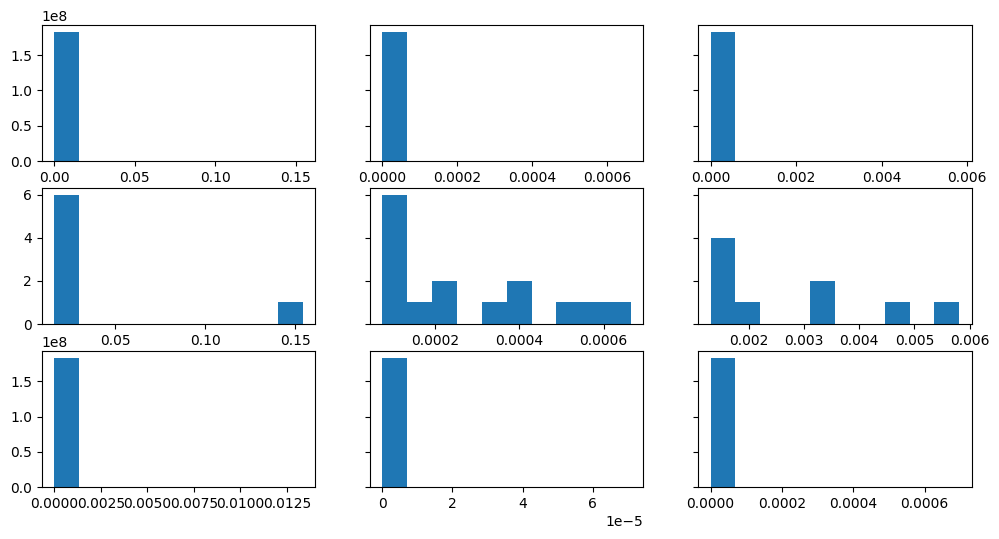

In [ ]:
path_alpharel = '/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptZero_2tasks.4/'

check = [0.015, 0.000075, 0.00075]

fig, axes = plt.subplots(nrows=3, ncols=3, sharey='row', figsize=(12, 6))
for seed in [0]:
    for ax_idx, rand_idx in enumerate([0,3,6]):
        with open(path_alpharel+'random'+str(rand_idx)+'_seed'+str(seed)+'model_1_fisher_old.pkl', 'rb') as handle:
            alpha_rel = CPU_Unpickler(handle).load()
            for i,(k,v) in enumerate(alpha_rel.items()):
              if i==0:
                  vals = v.flatten()
              else:
                  vals = torch.cat((vals,v.flatten()))
            # print(vals.shape)
        axes[0,ax_idx].hist(vals.numpy())
        vals = vals.numpy()
        print(np.max(vals), '50:',np.percentile(vals,50), '60:',np.percentile(vals,60), '70:',np.percentile(vals,70), '80:',np.percentile(vals,80), '90:',np.percentile(vals,90), '95:',np.percentile(vals,95))
        axes[1,ax_idx].hist(vals[vals>check[ax_idx]])
        axes[2,ax_idx].hist(vals[vals<check[ax_idx]])

In [ ]:
path_alpharel = '/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptZero_2tasks.4/'

check = [0.015, 0.000075, 0.00075]

for seed in [0]:
    for ax_idx, rand_idx in enumerate([0,3,6]):
        print(rand_idx)
        with open(path_alpharel+'random'+str(rand_idx)+'_seed'+str(seed)+'model_1_fisher_old.pkl', 'rb') as handle:
            alpha_rel = CPU_Unpickler(handle).load()
            for layer in ['layer.'+ str(i) for i in range(12)]+['last']:
                vals = np.array([])
                for k,v in alpha_rel.items():
                  if layer in k:
                    vals = np.append(vals,v.flatten().numpy())
                print(layer, np.max(vals), np.percentile(vals, 95), np.min(vals))

0
layer.0 0.01608683168888092 4.908024663768938e-11 0.0
layer.1 0.15432867407798767 2.0121286668090022e-11 0.0
layer.2 0.013359746895730495 4.753018048586626e-11 0.0
layer.3 0.016538558527827263 3.966243635605814e-11 0.0
layer.4 0.01672758348286152 9.132798753364e-11 0.0
layer.5 0.026489317417144775 7.476321853272514e-11 0.0
layer.6 0.022961843758821487 3.053910457850859e-11 0.0
layer.7 0.019067568704485893 3.3191632949069866e-11 0.0
layer.8 0.01015558559447527 3.8730526771835184e-11 0.0
layer.9 0.007788876071572304 2.787538021589708e-11 0.0
layer.10 0.009136032313108444 1.5541017518022613e-11 0.0
layer.11 0.15432867407798767 8.364811404301671e-12 0.0
last 0.0011382978409528732 6.353513454087072e-05 0.0
3
layer.0 0.00023287492513190955 9.511387554297839e-12 0.0
layer.1 0.00033764581894502044 1.5336537812285507e-12 0.0
layer.2 0.00041162085835821927 4.163223910579002e-12 0.0
layer.3 7.09453015588224e-05 3.7435908539773185e-12 0.0
layer.4 0.00041524917469359934 4.1233072295074264e-12 0.0

In [ ]:
# lambda < 1/(eta * alpha)
print(1 / (0.003))
# print(1 / (0.003 * 0.015))
print(1 / (0.003 * 3.1865901757577184e-11))
print(1 / (0.003 * 0.15432867))
print("")
# print(1 / (0.003 * 0.000075))
print(1 / (0.003 * 2.1764677083160722e-12))
print(1 / (0.003 * 0.00066471676))
print("")
# print(1 / (0.003 * 0.00075))
print(1 / (0.003 * 1.261917211350936e-11))
print(1 / (0.003 * 0.0058143595))
print("")
# print(1 / (0.003 * 0.0000000000001))

333.3333333333333
10460502133885.861
2159.8924770966623

153153355806612.22
501466.7199505145

26414833741469.13
57329.329796916296



In [ ]:
# 1/(eta * lambda)
print(1/(0.003 * 5000000)) # 50 x 10^5
print(1/(0.003 * 2159.8924770966623))

6.666666666666667e-05
0.15432866999999997


### EWC lambda

[0.4708, 0.5819, 0.48995, 0.47125, 0.46825, 0.5625, 0.6004, 0.5038]
[0.0, 0.2272, 0.0069, 0.0195, 0.0021, 0.1843, 0.2192, 0.0198]
[0.9416, 0.9366, 0.973, 0.923, 0.9344, 0.9407, 0.9816, 0.9878]


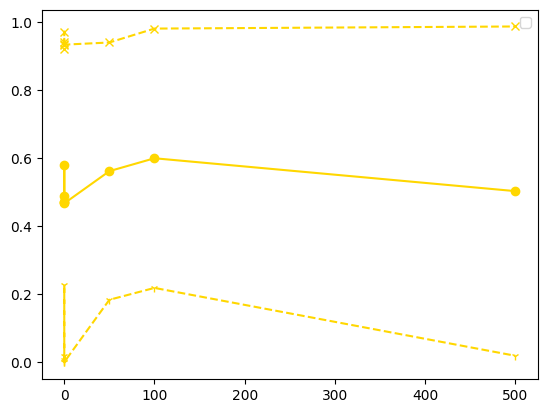

In [ ]:
paths_ancl = ['/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.2/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.7/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.8/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.12/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.4/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.5/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.6/'
              ]
x_vals = [0.00001, 0.001, 0.01, 0.02, 0.22, 50, 100, 500] # x 10^5
# 0.001, 100 (x 10^5)

for rand_idx,color in zip([0],['gold']):
    l1 = []
    l2 = []
    l3 = []
    for path in paths_ancl:
        expt = 'random'+str(rand_idx)+'_seed0_task1'
        # x = np.loadtxt(path+expt+'wd.txt', dtype=float)

        ypath = path + get_res_fname(rand_idx,path)

        l1.append(get_overall_f1(ypath))
        # l2.append(get_forgetting(ypath))
        l2.append(get_oldtask(ypath))
        l3.append(get_newtask(ypath))

    plt.plot(x_vals, l1, marker='o', color=color)
    plt.plot(x_vals, l2, '--', marker='1', color=color)
    plt.plot(x_vals, l3, '--', marker='x', color=color)

print(l1)
print(l2)
print(l3)

plt.legend()
plt.show()

[0.2313, 0.23285, 0.2355, 0.3618, 0.3512, 0.29955, 0.263, 0.49339999999999995]
[0.0, 0.0, 0.0, 0.2561, 0.3758, 0.1079, 0.0721, 0.0095]
[0.4626, 0.4657, 0.471, 0.4675, 0.3266, 0.4912, 0.4539, 0.9773]


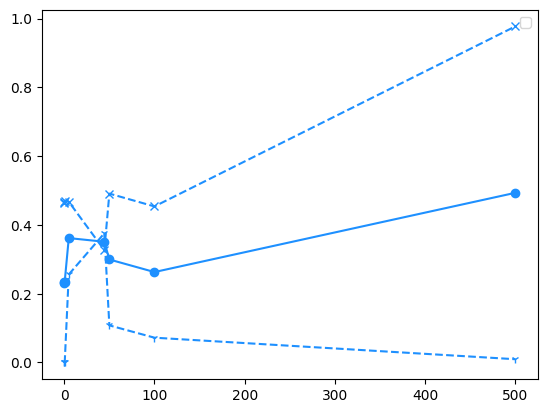

In [ ]:
paths_ancl = ['/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.2/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.9/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.3/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.13/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.4/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.5/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.6/'
              ]
x_vals = [0.00001, 0.001, 0.5, 5, 44.44, 50, 100, 500] # x 10^5
# 5, 44.44

for rand_idx,color in zip([3],['dodgerblue']):
    l1 = []
    l2 = []
    l3 = []
    for path in paths_ancl:
        expt = 'random'+str(rand_idx)+'_seed0_task1'
        # x = np.loadtxt(path+expt+'wd.txt', dtype=float)

        ypath = path + get_res_fname(rand_idx,path)

        l1.append(get_overall_f1(ypath))
        # l2.append(get_forgetting(ypath))
        l2.append(get_oldtask(ypath))
        l3.append(get_newtask(ypath))

    plt.plot(x_vals, l1, marker='o', color=color)
    plt.plot(x_vals, l2, '--', marker='1', color=color)
    plt.plot(x_vals, l3, '--', marker='x', color=color)

print(l1)
print(l2)
print(l3)

plt.legend()
plt.show()

[0.3722, 0.31045, 0.3648, 0.37129999999999996, 0.4219, 0.29675, 0.36195000000000005, 0.43515]
[0.0, 0.0, 0.3728, 0.254, 0.114, 0.1834, 0.0036, 0.3959]
[0.7444, 0.6209, 0.3568, 0.4886, 0.7298, 0.4101, 0.7203, 0.4744]


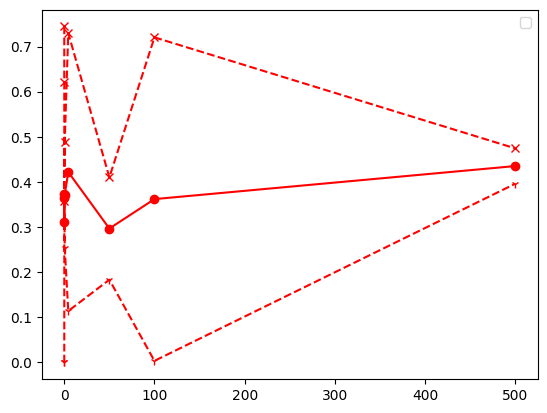

In [ ]:
paths_ancl = ['/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.2/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.11/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.9/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.14/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.4/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.5/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.6/'
              ]
x_vals = [0.00001, 0.001, 0.05, 0.5, 4.44, 50, 100, 500] # x 10^5
# 0.05, 0.5, 500

for rand_idx,color in zip([6],['red']):
    l1 = []
    l2 = []
    l3 = []
    for path in paths_ancl:
        expt = 'random'+str(rand_idx)+'_seed0_task1'
        # x = np.loadtxt(path+expt+'wd.txt', dtype=float)

        ypath = path + get_res_fname(rand_idx,path)

        l1.append(get_overall_f1(ypath))
        # l2.append(get_forgetting(ypath))
        l2.append(get_oldtask(ypath))
        l3.append(get_newtask(ypath))

    plt.plot(x_vals, l1, marker='o', color=color)
    plt.plot(x_vals, l2, '--', marker='1', color=color)
    plt.plot(x_vals, l3, '--', marker='x', color=color)

print(l1)
print(l2)
print(l3)

plt.legend()
plt.show()

In [ ]:
# y_aux, y_old = [], []
# for i,(path, m) in enumerate(zip(paths,markers)):
#     y = np.loadtxt(path+expt+'wd.txt', dtype=float)
#     y_aux.append(y[0])
#     y_old.append(y[1])
#     # print(y)
#     plt.plot(i,y[0], marker=m)
#     plt.plot(i,y[1], marker=m)
# plt.plot(y_aux, label='wd_la')
# plt.plot(y_old, label='wd_old')
# plt.legend()
# plt.show()

### Func Def

In [3]:
from matplotlib import pyplot as plt
import numpy as np

In [8]:
def get_overall_f1(path):
    list_of_lists = []
    with open(path, 'r') as f:
        for line in f:
            inner_list = [float(elt.strip()) for elt in line.split('\t')]
            list_of_lists.append(inner_list)
    f1_matrix = np.array(list_of_lists)
    return np.mean(f1_matrix[1,:2])

def get_overall_f1_all(path):
    list_of_lists = []
    with open(path, 'r') as f:
        for line in f:
            inner_list = [float(elt.strip()) for elt in line.split('\t')]
            list_of_lists.append(inner_list)
    f1_matrix = np.array(list_of_lists)
    return np.mean(f1_matrix[5,:])

def get_forgetting(path):
    list_of_lists = []
    with open(path, 'r') as f:
        for line in f:
            inner_list = [float(elt.strip()) for elt in line.split('\t')]
            list_of_lists.append(inner_list)
    f1_matrix = np.array(list_of_lists)
    temp_forgetting = []
    for i in range(1): # for i in range(5):
        temp_forgetting.append(np.max(f1_matrix[i:-1,i])-f1_matrix[1,i]) # temp_forgetting.append(np.max(f1_matrix[i:-1,i])-f1_matrix[5,i])
    return np.mean(temp_forgetting)

def get_forgetting_all(path):
    list_of_lists = []
    with open(path, 'r') as f:
        for line in f:
            inner_list = [float(elt.strip()) for elt in line.split('\t')]
            list_of_lists.append(inner_list)
    f1_matrix = np.array(list_of_lists)
    temp_forgetting = []
    for i in range(5):
        temp_forgetting.append(np.max(f1_matrix[i:-1,i])-f1_matrix[5,i])
    return np.mean(temp_forgetting)

def get_newtask(path):
    list_of_lists = []
    with open(path, 'r') as f:
        for line in f:
            inner_list = [float(elt.strip()) for elt in line.split('\t')]
            list_of_lists.append(inner_list)
    f1_matrix = np.array(list_of_lists)
    return f1_matrix[1,1]

def get_oldtask(path):
    list_of_lists = []
    with open(path, 'r') as f:
        for line in f:
            inner_list = [float(elt.strip()) for elt in line.split('\t')]
            list_of_lists.append(inner_list)
    f1_matrix = np.array(list_of_lists)
    return f1_matrix[1,0]

def get_res_fname(rand_idx,path,dataset):
    if 'ANCLMAS' in path or 'ANCLEWC' in path:
        return dataset+'_bert_adapter_ewc_ancl_'+'random'+str(rand_idx)+'_seed0_f1.txt'
    elif 'ANCLLWF' in path:
        return dataset+'_bert_adapter_lwf_ancl_'+'random'+str(rand_idx)+'_seed0_f1.txt'
    elif 'LWF' in path:
        return dataset+'_bert_adapter_lwf_'+'random'+str(rand_idx)+'_seed0_f1.txt'
    elif 'LAEWC' in path or 'LAMAS' in path:
        return dataset+'_bert_adapter_ewc_freeze_'+'random'+str(rand_idx)+'_seed0_f1.txt'
    else:
        return dataset+'_bert_adapter_ewc_'+'random'+str(rand_idx)+'_seed0_f1.txt'

### WD

In [ ]:
dataset='annomi'
# path_alpharel = '/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAMAS_wlast_AdaptZero_2tasks.ind_max.'
path_alpharel = '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_NoL1LAMAS_AdaptZero_2tasks.ind_max.'
path_sets1 = [
    # # ['/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast.ind_max.1/'
    # ['/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.2/'
    # ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.3/'
    # ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.4/'
    # ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.5/'
    # ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.6/'
    # ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.7/'
    # ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.8/'
    # ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.9/'
    # ]
        ['/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.7/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.8/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.9/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.1/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.4/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.6/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_NoL1LAMAS_AdaptKTCFsv2.ind_max.1/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_NoL1LAMAS_AdaptKTCFsv2.ind_max.8/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_NoL1LAMAS_AdaptKTCFsv2.ind_max.9/'
    ]
]
# m_labels = [100,200,400,500,600,800,1000,1500]
m_labels = [1,10,50,100,500,800,100,10,50]
markers = ['x','x','x','x','x','x','o','o','o']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
for ax_idx,paths in enumerate(path_sets1):
    # for rand_idx,color in zip([0,3,6],['gold','dodgerblue','red']):
    for rand_idx,color in zip([0],['gold']):
        for path,m_label,marker in zip(paths,m_labels,markers):
            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path,dataset)
            forg = get_forgetting(ypath)*100
            newtask = get_newtask(ypath)*100

            fname = re.findall(r'\d+', path[-3:])[0]
            with open(path_alpharel+fname+'/random'+str(rand_idx)+'_seed0'+'model_1_relative_fisher.pkl', 'rb') as handle:
                alpha_rel = CPU_Unpickler(handle).load()
            with open(path+expt+'_wd_old_magn.pkl', 'rb') as handle:
                wd_old_magn = CPU_Unpickler(handle).load()
            cnt_tot = 0
            wd_high, cnt_wd_high = 0, 0
            wd_low = 0
            for k,v_ar in alpha_rel.items():
              if 'output.adapter' in k or 'output.LayerNorm' in k or (dataset=='hwu64' and 'last' in k):
                  assert v_ar.shape==wd_old_magn[k].shape
                  v_ar, wd = v_ar.flatten().numpy(), wd_old_magn[k].flatten().numpy()
                  cnt_tot += len(v_ar)
                  wd_high += np.sum(wd[np.where(v_ar>0.5)], axis=0)
                  cnt_wd_high += len(wd[np.where(v_ar>0.5)])
                  wd_low += np.sum(wd[np.where(v_ar<=0.5)], axis=0)
            perc_wd_high = cnt_wd_high/cnt_tot
            wd_high = wd_high/cnt_wd_high
            wd_low = wd_low/(cnt_tot-cnt_wd_high)
            axes[0,0].plot(wd_high, forg, marker=marker, color=color)
            axes[0,0].text(wd_high, forg+2, str(m_label)+','+str("{:1.2f}".format(perc_wd_high)), ha="center")
            axes[0,1].plot(wd_high, newtask, marker=marker, color=color)
            axes[0,1].text(wd_high, newtask+2, str(m_label)+','+str("{:1.2f}".format(perc_wd_high)), ha="center")
            axes[1,0].plot(wd_low, forg, marker=marker, color=color)
            axes[1,0].text(wd_low, forg+2, "%d" %m_label, ha="center")
            axes[1,1].plot(wd_low, newtask, marker=marker, color=color)
            axes[1,1].text(wd_low, newtask+2, "%d" %m_label, ha="center")

plt.legend()
plt.show()

In [ ]:
path_sets = [[
    '/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptZero_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTEasy_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKT_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv1_2tasks.4'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv2_2tasks.4'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv3_2tasks.4'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTStrictv2_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTStrict_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTStrictv3_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptOne_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLEWC_wlast_2tasks.4'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.4/'
],
    [
    '/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptZero_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptKTEasy_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptKT_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptKTCFsv1_2tasks.4'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptKTCFsv2_2tasks.4'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptKTCFsv3_2tasks.4'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptKTStrictv2_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptKTStrict_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptKTStrictv3_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptOne_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLEWC_wlast_2tasks.4'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.4/'
]]

marker_labels = [
    'None','Low-None','Low-RelativeImp'
    ,'Med-None','Med-RelativeImp','Med-PasImp'
    ,'Strong-None','Strong-RelativeImp','Strong-PastImp'
    ,'Frozen','ANCL','Low-PasImp' # EWC
]

markers = ['o','x','X'
,'1','2','3'
,'>','^','<'
,'.','h','+']

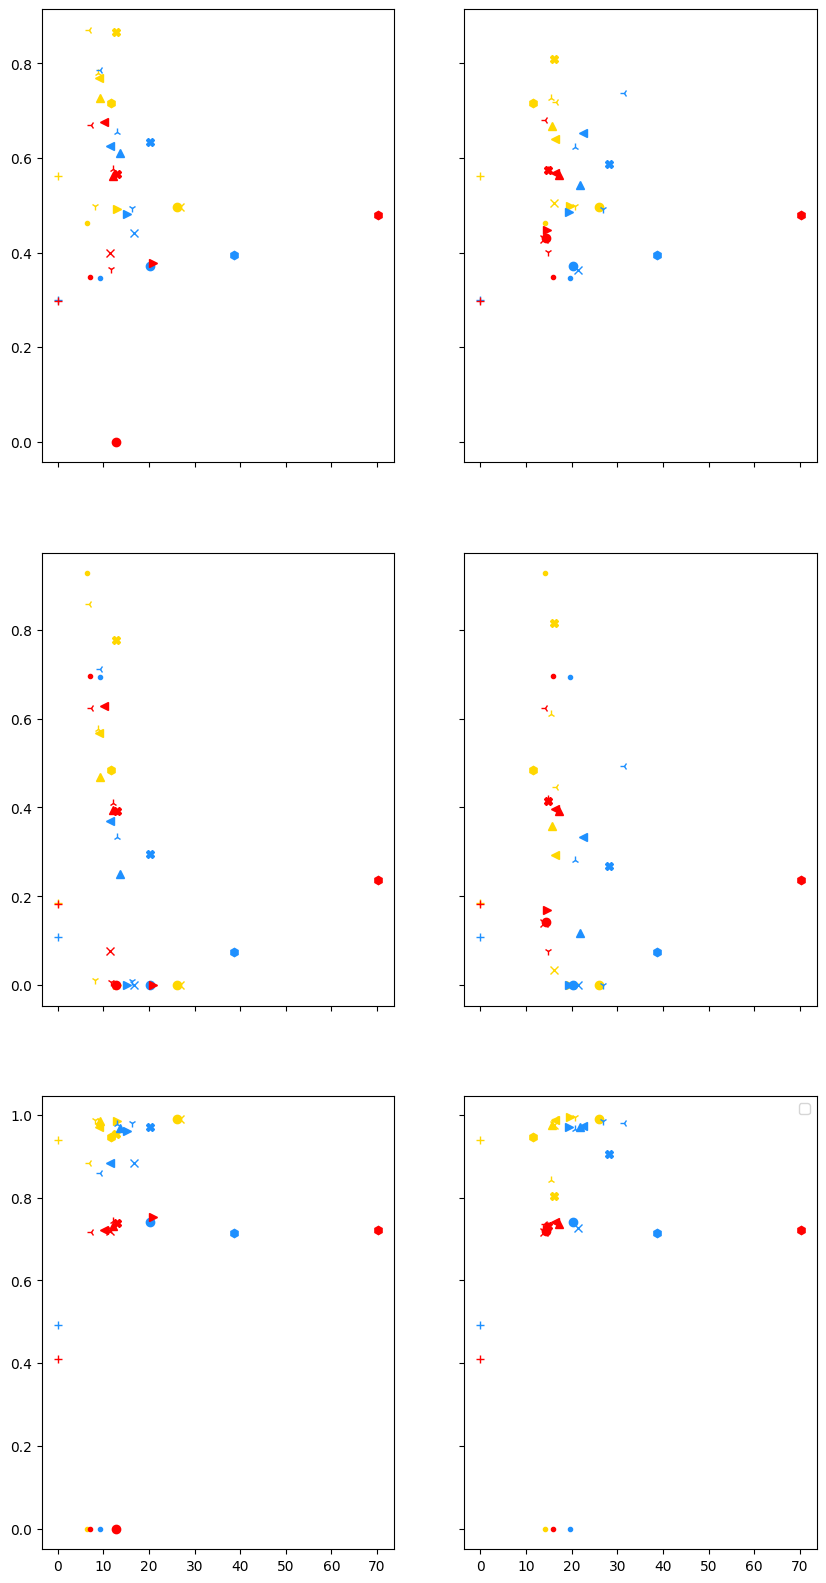

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex='col', sharey='row', figsize=(10, 20))
for ax_idx,paths in enumerate(path_sets):
    for rand_idx,color in zip([0,3,6],['gold','dodgerblue','red']):
        for path, m in zip(paths,markers):
            if path[-1]!='/':
                best_hp_idx = 0
                best_ov_f1 = 0
                for hp_idx in ['.1/','.2/','.3/','.4/']:
                    temp_path = path + hp_idx
                    ypath = temp_path + get_res_fname(rand_idx,path)
                    try:
                        ov_f1 = get_overall_f1(ypath)
                    except FileNotFoundError:
                        continue
                    if ov_f1 > best_ov_f1:
                        best_ov_f1 = ov_f1
                        best_hp_idx = hp_idx
                path = path + best_hp_idx

            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path)
            ov_f1 = get_overall_f1(ypath)
            old = get_oldtask(ypath)
            new = get_newtask(ypath)

            if '_EWC' in path:
                # x_vals = np.array(plt.gca().get_xlim())
                # x_vals = [0,70]
                # axes[0,ax_idx].plot(x_vals, ov_f1 + 0 * x_vals, '--')
                # axes[1,ax_idx].plot(x_vals, old + 0 * x_vals, '--')
                # axes[2,ax_idx].plot(x_vals, new + 0 * x_vals, '--')
                x = 0,0
            else:
                x = np.loadtxt(path+expt+'wd.txt', dtype=float)

            axes[0,ax_idx].plot(x[0],ov_f1, marker=m, color=color)
            axes[1,ax_idx].plot(x[0],old, marker=m, color=color)
            axes[2,ax_idx].plot(x[0],new, marker=m, color=color)

plt.legend()
plt.show()

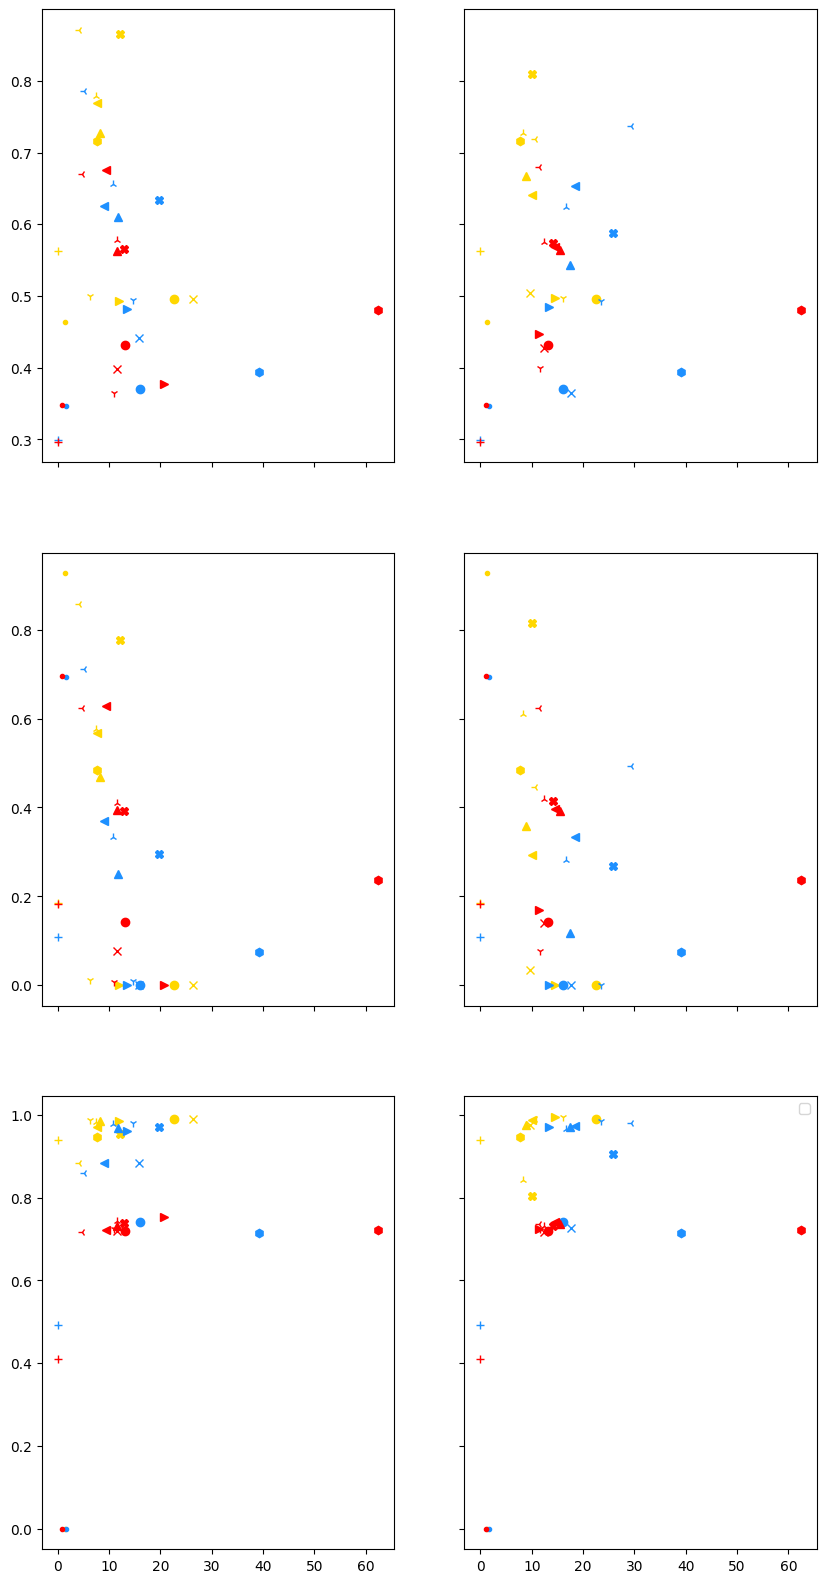

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex='col', sharey='row', figsize=(10, 20))
for ax_idx,paths in enumerate(path_sets):
    for rand_idx,color in zip([0,3,6],['gold','dodgerblue','red']):
        for path, m in zip(paths,markers):
            if path[-1]!='/':
                best_hp_idx = 0
                best_ov_f1 = 0
                for hp_idx in ['.1/','.2/','.3/','.4/']:
                    temp_path = path + hp_idx
                    ypath = temp_path + get_res_fname(rand_idx,path)
                    try:
                        ov_f1 = get_overall_f1(ypath)
                    except FileNotFoundError:
                        continue
                    if ov_f1 > best_ov_f1:
                        best_ov_f1 = ov_f1
                        best_hp_idx = hp_idx
                path = path + best_hp_idx

            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path)
            ov_f1 = get_overall_f1(ypath)
            old = get_oldtask(ypath)
            new = get_newtask(ypath)

            if '_EWC' in path:
                # x_vals = np.array(plt.gca().get_xlim())
                # x_vals = [0,70]
                # axes[0,ax_idx].plot(x_vals, ov_f1 + 0 * x_vals, '--')
                # axes[1,ax_idx].plot(x_vals, old + 0 * x_vals, '--')
                # axes[2,ax_idx].plot(x_vals, new + 0 * x_vals, '--')
                x = 0,0
            else:
                x = np.loadtxt(path+expt+'wd.txt', dtype=float)

            axes[0,ax_idx].plot(x[1],ov_f1, marker=m, color=color)
            axes[1,ax_idx].plot(x[1],old, marker=m, color=color)
            axes[2,ax_idx].plot(x[1],new, marker=m, color=color)

plt.legend()
plt.show()

### Hyper-paramters

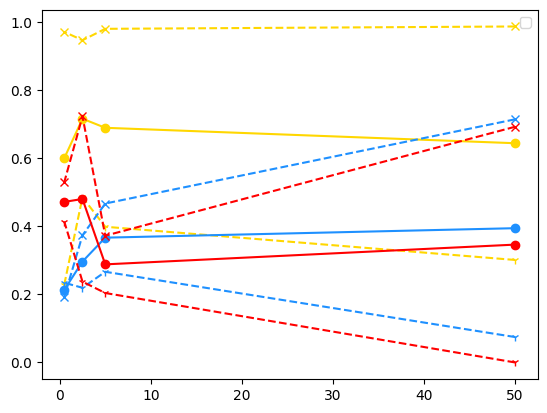

In [ ]:
paths_ancl = ['/content/gdrive/MyDrive/Collas24/IntentSH_ANCLEWC_wlast_2tasks.4.1/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLEWC_wlast_2tasks.4.2/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLEWC_wlast_2tasks.4.3/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLEWC_wlast_2tasks.4.4/']
for rand_idx,color in zip([0,3,6],['gold','dodgerblue','red']):
    l1 = []
    l2 = []
    l3 = []
    for path in paths_ancl:
        expt = 'random'+str(rand_idx)+'_seed0_task1'
        # x = np.loadtxt(path+expt+'wd.txt', dtype=float)

        ypath = path + get_res_fname(rand_idx,path)

        l1.append(get_overall_f1(ypath))
        # l2.append(get_forgetting(ypath))
        l2.append(get_oldtask(ypath))
        l3.append(get_newtask(ypath))

    plt.plot([50, 5, 2.5, 0.5], l1, marker='o', color=color) x 10^5
    plt.plot([50, 5, 2.5, 0.5], l2, '--', marker='1', color=color)
    plt.plot([50, 5, 2.5, 0.5], l3, '--', marker='x', color=color)

plt.legend()
plt.show()

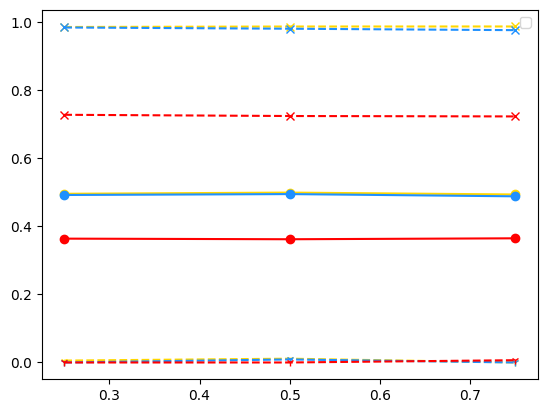

In [ ]:
paths_ancl = ['/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv1_2tasks.4.1/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv1_2tasks.4.2/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv1_2tasks.4.3/']
for rand_idx,color in zip([0,3,6],['gold','dodgerblue','red']):
    l1 = []
    l2 = []
    l3 = []
    for path in paths_ancl:
        expt = 'random'+str(rand_idx)+'_seed0_task1'
        # x = np.loadtxt(path+expt+'wd.txt', dtype=float)

        ypath = path + get_res_fname(rand_idx,path)

        l1.append(get_overall_f1(ypath))
        # l2.append(get_forgetting(ypath))
        l2.append(get_oldtask(ypath))
        l3.append(get_newtask(ypath))

    plt.plot([0.25, 0.5, 0.75], l1, marker='o', color=color)
    plt.plot([0.25, 0.5, 0.75], l2, '--', marker='1', color=color)
    plt.plot([0.25, 0.5, 0.75], l3, '--', marker='x', color=color)

plt.legend()
plt.show()

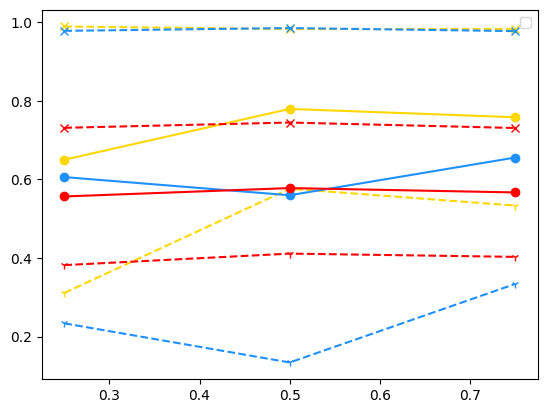

In [ ]:
paths_ancl = ['/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv2_2tasks.4.1/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv2_2tasks.4.2/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv2_2tasks.4.3/']
for rand_idx,color in zip([0,3,6],['gold','dodgerblue','red']):
    l1 = []
    l2 = []
    l3 = []
    for path in paths_ancl:
        expt = 'random'+str(rand_idx)+'_seed0_task1'
        # x = np.loadtxt(path+expt+'wd.txt', dtype=float)

        ypath = path + get_res_fname(rand_idx,path)

        l1.append(get_overall_f1(ypath))
        # l2.append(get_forgetting(ypath))
        l2.append(get_oldtask(ypath))
        l3.append(get_newtask(ypath))

    plt.plot([0.25, 0.5, 0.75], l1, marker='o', color=color)
    plt.plot([0.25, 0.5, 0.75], l2, '--', marker='1', color=color)
    plt.plot([0.25, 0.5, 0.75], l3, '--', marker='x', color=color)

plt.legend()
plt.show()

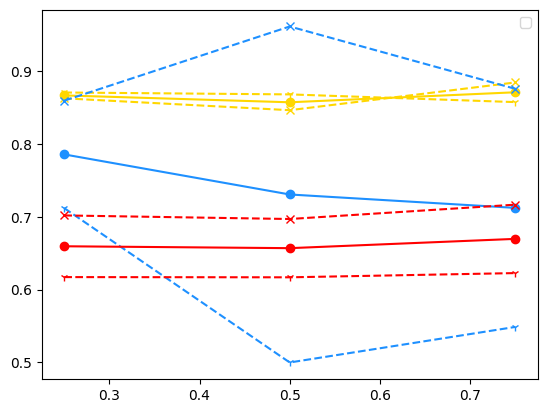

In [ ]:
paths_ancl = ['/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv3_2tasks.4.1/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv3_2tasks.4.2/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv3_2tasks.4.3/']
for rand_idx,color in zip([0,3,6],['gold','dodgerblue','red']):
    l1 = []
    l2 = []
    l3 = []
    for path in paths_ancl:
        expt = 'random'+str(rand_idx)+'_seed0_task1'
        # x = np.loadtxt(path+expt+'wd.txt', dtype=float)

        ypath = path + get_res_fname(rand_idx,path)

        l1.append(get_overall_f1(ypath))
        # l2.append(get_forgetting(ypath))
        l2.append(get_oldtask(ypath))
        l3.append(get_newtask(ypath))

    plt.plot([0.25, 0.5, 0.75], l1, marker='o', color=color)
    plt.plot([0.25, 0.5, 0.75], l2, '--', marker='1', color=color)
    plt.plot([0.25, 0.5, 0.75], l3, '--', marker='x', color=color)

plt.legend()
plt.show()

### ANCL-EWC

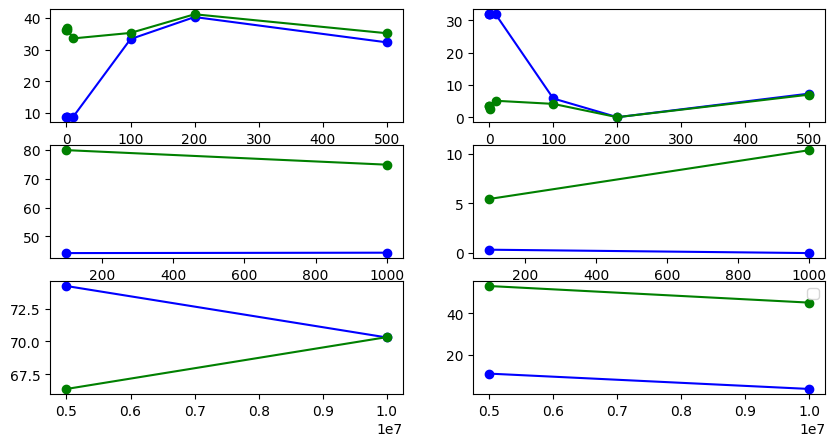

In [25]:
t = 2
datasets=['annomi','hwu64','hwu64']
# path_alpharel = '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_NoL1LAMAS_AdaptZero_2tasks.ind_max.'
path_sets = [
    ['/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.3/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.1/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.2/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.4/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.5/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.7/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.6/'
    ],
    ['/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.3/',
     '/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.2/'
    ],
    ['/content/gdrive/MyDrive/Collas24/IntentSH_EWC_wlast.4/',
     '/content/gdrive/MyDrive/Collas24/IntentSH_EWC_wlast.5/']
  ]

x_label_sets = [[0.01,0.1,1,10,100,200,500],[100,1000],[5000000,10000000]]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 5))
for ax_idx,(dataset,paths,x_labels) in enumerate(zip(datasets,path_sets,x_label_sets)):
    for rand_idx in [0]:
        l1, l2, l3 = [], [], []
        l1_ancl, l2_ancl, l3_ancl = [], [], []
        for path in paths:
            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path,dataset)
            if t==6:
                l1.append(get_overall_f1_all(ypath)*100)
                l2.append(get_forgetting_all(ypath)*100)
            else:
                l1.append(get_overall_f1(ypath)*100)
                l2.append(get_forgetting(ypath)*100)

            best_ancl_idx = '.1'
            best_score = 0
            for ancl_idx in ['.1','.2','.3','.4','.5','.6']:
                ancl_path = path[:-1].replace('MAS','ANCLMAS').replace('EWC','ANCLEWC') + ancl_idx + '/'
                ypath = ancl_path + get_res_fname(rand_idx,ancl_path,dataset)
                try:
                    if t==6:
                        score = get_overall_f1_all(ypath)
                    else:
                        score = get_overall_f1(ypath)
                except FileNotFoundError:
                    continue
                if score > best_score:
                    best_score = score
                    best_ancl_idx = ancl_idx
            ancl_path = path[:-1].replace('MAS','ANCLMAS').replace('EWC','ANCLEWC') + best_ancl_idx + '/'
            ypath = ancl_path + get_res_fname(rand_idx,ancl_path,dataset)
            if t==6:
                l1_ancl.append(get_overall_f1_all(ypath)*100)
                l2_ancl.append(get_forgetting_all(ypath)*100)
            else:
                l1_ancl.append(get_overall_f1(ypath)*100)
                l2_ancl.append(get_forgetting(ypath)*100)

        axes[ax_idx,0].plot(x_labels, l1, marker='o', color='blue')
        axes[ax_idx,0].plot(x_labels, l1_ancl, marker='o', color='green')

        axes[ax_idx,1].plot(x_labels, l2, marker='o', color='blue')
        axes[ax_idx,1].plot(x_labels, l2_ancl, marker='o', color='green')


plt.legend()
plt.show()

### ANCL-LWF

In [ ]:
t = 2
datasets=['annomi','hwu64']
# path_alpharel = '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_NoL1LAMAS_AdaptZero_2tasks.ind_max.'
path_sets = [
    ['/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.1/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.2/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.3/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.4/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.5/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.6/'
    ],
    ['/content/gdrive/MyDrive/Collas24/IntentSH_LWF_wlast.' + str(i) + '/' for i in range(1,17)
    ]
  ]

x_label_sets = [[1,2,3,4,5,6], [i for i in range(1,17)]]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
for ax_idx,(dataset,paths,x_labels) in enumerate(zip(datasets,path_sets,x_label_sets)):
    for rand_idx in [0]:
        l1, l2, l3 = [], [], []
        for path in paths:
            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path,dataset)
            if t==6:
                l1.append(get_overall_f1_all(ypath)*100)
                l2.append(get_forgetting_all(ypath)*100)
            else:
                l1.append(get_overall_f1(ypath)*100)
                l2.append(get_forgetting(ypath)*100)

        axes[ax_idx,0].plot(x_labels, l1, marker='o', color='blue')
        axes[ax_idx,1].plot(x_labels, l2, marker='o', color='blue')


plt.legend()
plt.show()

In [ ]:
t = 2
tasets=['annomi','hwu64']
# path_alpharel = '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_NoL1LAMAS_AdaptZero_2tasks.ind_max.'
path_sets = [
    ['/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.9/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.1/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.2/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.3/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.4/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.5/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.6/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.7/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.8/'
    ],
    ['/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast.' + str(i) + '/' for i in range(1,6)
    ]
  ]

x_label_sets = [[1,2,3,4,5,6,7,8,9],[1,2,3,4,5]]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))
for ax_idx,(dataset,paths,x_labels) in enumerate(zip(datasets,path_sets,x_label_sets)):
    for rand_idx in [0]:
        l1, l2, l3 = [], [], []
        for path in paths:
            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path,dataset)
            if t==6:
                l1.append(get_overall_f1_all(ypath)*100)
                l2.append(get_forgetting_all(ypath)*100)
            else:
                l1.append(get_overall_f1(ypath)*100)
                l2.append(get_forgetting(ypath)*100)
                l3.append(get_newtask(ypath)*100)

        axes[ax_idx,0].plot(x_labels, l1, marker='o', color='blue')
        axes[ax_idx,1].plot(x_labels, l2, marker='o', color='blue')
        axes[ax_idx,2].plot(x_labels, l3, marker='o', color='blue')


plt.legend()
plt.show()